In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from scipy.stats import skew
import numpy as np
import seaborn as sns

In [2]:
train=pd.read_csv('C:\\Users\\PIYALI\\train_nomissing.csv')

In [3]:
train['Utilities'].value_counts()

AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64

In [4]:
train['PoolQC'].value_counts()

None    1453
Gd         3
Ex         2
Fa         2
Name: PoolQC, dtype: int64

In [5]:
train['Street'].value_counts()

Pave    1454
Grvl       6
Name: Street, dtype: int64

In [6]:
train.drop(columns=['Utilities', 'Street', 'PoolQC'],inplace=True)

# LABEL ENCODING ORDINAL VARIABLES

In [7]:
# Working with ordinal predictors

def QualToInt(x):
    if(x=='Ex'):
        r = 5
    elif(x=='Gd'):
        r = 4
    elif(x=='TA'):
        r = 3
    elif(x=='Fa'):
        r = 2
    elif(x=='Po'):
        r = 1
    else:
        r = 0
    return r
train['ExterQual'] = train['ExterQual'].apply(QualToInt)
train['ExterCond'] = train['ExterCond'].apply(QualToInt)
train['KitchenQual'] = train['KitchenQual'].apply(QualToInt)
train['HeatingQC'] = train['HeatingQC'].apply(QualToInt)
train['BsmtQual'] = train['BsmtQual'].apply(QualToInt)
train['BsmtCond'] = train['BsmtCond'].apply(QualToInt)
train['FireplaceQu'] = train['FireplaceQu'].apply(QualToInt)
train['GarageQual'] = train['GarageQual'].apply(QualToInt)



In [8]:
train['LandSlope'] = train['LandSlope'].map({'Gtl': 2, 'Mod': 1, 'Sev': 0}).astype(int)

In [9]:
train['CentralAir'] = train['CentralAir'].map({'N': 0, 'Y': 1}).astype(int)

In [10]:
train['PavedDrive'] = train['PavedDrive'].map({'N': 0, 'P': 1, 'Y': 2}).astype(int)

In [11]:
train['GarageFinish'] = train['GarageFinish'].map({'NoGarage': 0, 'Unf': 1, 'RFn': 2, 'Fin': 3}).fillna(0).astype(int)

In [12]:
train['BsmtExposure'] = train['BsmtExposure'].map({'NoGarage': 0, 'No': 1, 'Mn': 2, 'Av': 3, 'Gd': 4}).fillna(0).astype(int)

In [13]:
train['Functional'] = train['Functional'].map({
    'Typ': 7, 
    'Min1': 6, 
    'Min2': 5, 
    'Mod': 4, 
    'Maj1': 3, 
    'Maj2': 2, 
    'Sev': 1, 
    'Sal': 0
}).astype(int)

In [14]:
train['Foundation'] = train['Foundation'].map({
    'Wood': 0,       # Wood foundation
    'Stone': 1,      # Stone foundation
    'BrkTil': 2,     # Brick & Tile foundation
    'CBlock': 3,     # Cinder Block foundation
    'Slab': 4,       # Slab foundation
    'PConc': 5       # Poured Concrete foundation
}).astype(int)

In [15]:
# MSSubClass=The building class
train['MSSubClass'] = train['MSSubClass'].apply(str)

# Changing OverallCond into a categorical variable
train['OverallCond'] = train['OverallCond'].astype(str)

# Year and month sold are transformed into categorical features.
#train['YrSold'] = train['YrSold'].astype(str)
#train['MoSold'] = train['MoSold'].astype(str)


In [16]:
le = LabelEncoder()

cat_cols = ['MSSubClass', 'OverallCond']


for col in cat_cols:
    train[col] = le.fit_transform(train[col])

In [17]:
train['Alley'] = train['Alley'].replace({'None': 0, 'Grvl': 1, 'Pave': 2}).astype(int)

In [18]:
train['Fence'] = train['Fence'].replace({'None': 0, 'MnWw': 1, 'MnPrv': 2, 'GdWo': 3, 'GdPrv': 4}).astype(int)


In [19]:
train['LotShape'] = train['LotShape'].replace({'Reg': 3, 'IR1': 2, 'IR2': 1, 'IR3': 0}).astype(int)

In [20]:
train['BsmtFinType1'] = train['BsmtFinType1'].replace({
    'GLQ': 6,
    'ALQ': 5,
    'BLQ': 4,
    'Rec': 3,
    'LwQ': 2,
    'Unf': 1,
    'NoBasement': 0 
}).astype(int)

In [21]:
train['BsmtFinType2'] = train['BsmtFinType2'].replace({
    'GLQ': 6,
    'ALQ': 5,
    'BLQ': 4,
    'Rec': 3,
    'LwQ': 2,
    'Unf': 1,
    'NoBasement': 0 
}).astype(int)

In [22]:
train=train.drop(columns='Unnamed: 0')

# BOXCOX TRANSFORM OF HIGHLY SKEWED FEATURES

In [23]:
numeric_feats = [
    'LotFrontage', 'LotArea',
    'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 
    'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 
    'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 
    'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 
    'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 
    'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 
    'SalePrice']

# Check the skew of all numerical features
skewed_feats = train[numeric_feats].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
print("\nSkew in numerical features: \n")
skewness = pd.DataFrame({'Skew' :skewed_feats})
skewness.head()


Skew in numerical features: 



,Skew
PoolArea,14.348342
3SsnPorch,7.727026
LowQualFinSF,7.452650
MiscVal,5.165390
BsmtHalfBath,3.929022


In [24]:
'''skewness = skewness[abs(skewness) > 0.75]
print("There are {} skewed numerical features to Box Cox transform".format(skewness.shape[0]))

from scipy.special import boxcox1p
skewed_features = skewness.index
lam = 0.15
for feat in skewed_features:
    train[feat] = boxcox1p(train[feat], lam)'''

'skewness = skewness[abs(skewness) > 0.75]\nprint("There are {} skewed numerical features to Box Cox transform".format(skewness.shape[0]))\n\nfrom scipy.special import boxcox1p\nskewed_features = skewness.index\nlam = 0.15\nfor feat in skewed_features:\n    train[feat] = boxcox1p(train[feat], lam)'

# ONE HOT ENCODING ORDINAL FEATURES

In [25]:
train=pd.get_dummies(train)

In [26]:
y=train['SalePrice']

In [27]:
y = y.reset_index(drop=True)
train = train.reset_index(drop=True)

# OUTLIER DETECTION

In [28]:
from sklearn.ensemble import IsolationForest

X = train.values  # Convert DataFrame to numpy array

# Create an Isolation Forest instance
isolation_forest = IsolationForest(random_state=42)

# Fit the Isolation Forest model
isolation_forest.fit(X)

# Predict outliers (anomalies)
outliers = isolation_forest.predict(X)

In [29]:
X[outliers==-1].shape

(9, 220)

In [30]:
outlier_indices = np.where(outliers == -1)[0]
outlier_indices

array([  88,  523,  635,  705,  954, 1230, 1298, 1337, 1387], dtype=int64)

<Axes: xlabel='GrLivArea', ylabel='SalePrice'>

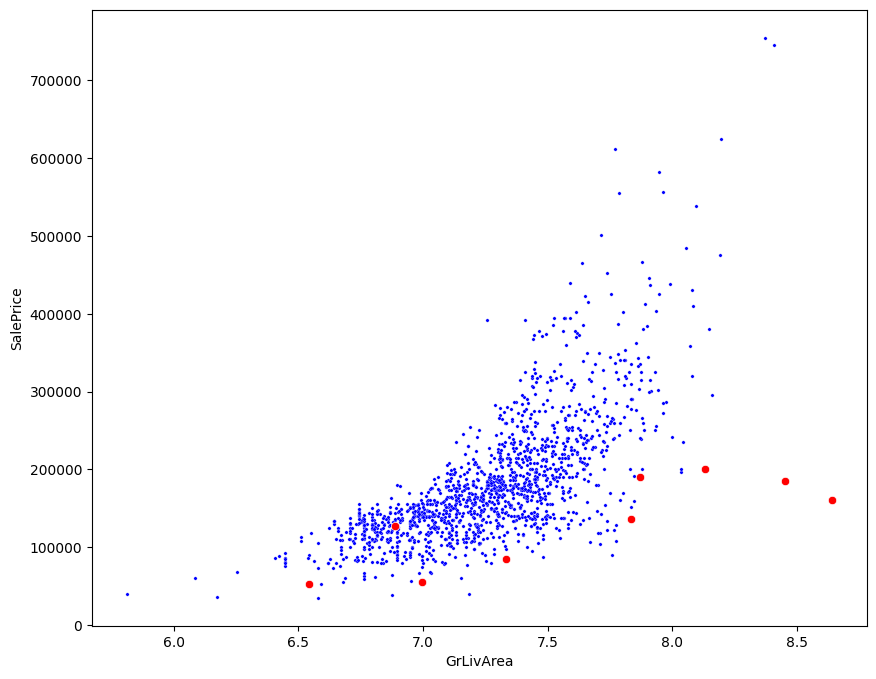

In [31]:
figure = plt.figure(figsize = (10, 8))
sns.scatterplot(x=train['GrLivArea'], y=y, color = "blue", s = 6)
# plot outlier values
sns.scatterplot(x=train.iloc[outlier_indices]['GrLivArea'], y=y[outlier_indices], color = "red")

<Axes: xlabel='GrLivArea', ylabel='SalePrice'>

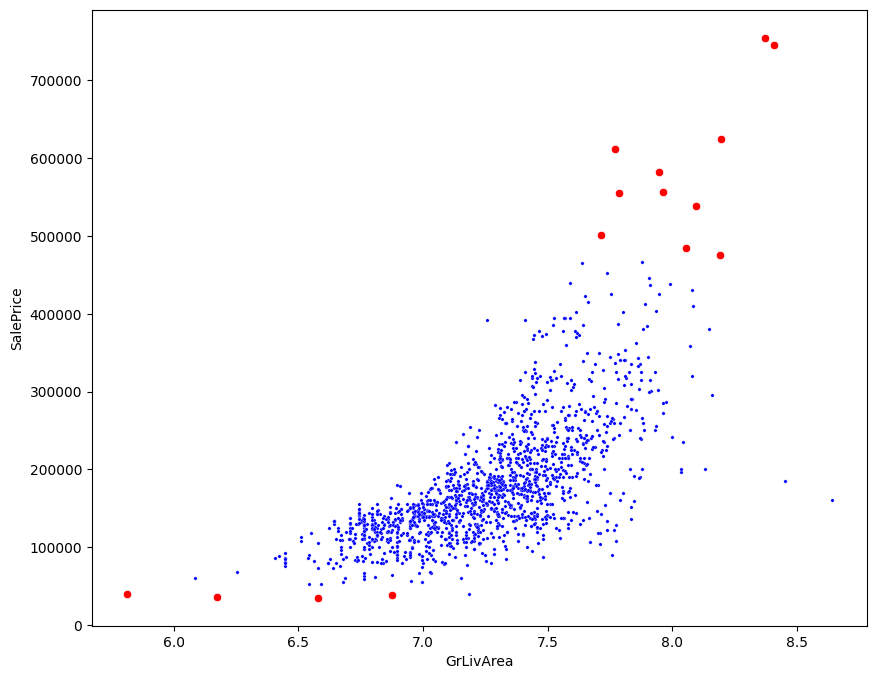

In [32]:
from sklearn.neighbors import LocalOutlierFactor

lof_model = LocalOutlierFactor(n_neighbors = 150, metric = "manhattan",
                            contamination = 0.01)
# which features to take into account?
selected_features = 'all'
# model fitting
if selected_features == 'all': y_pred = lof_model.fit_predict(train[:])
else: y_pred = lof_model.fit_predict(train[features])
# filter outlier index
idx_LOF = np.where(y_pred == -1)[0] # negative values are outliers

outlier_values = train.iloc[idx_LOF]
# plot data
figure = plt.figure(figsize = (10, 8))
sns.scatterplot(x=train.GrLivArea, y=y, color = "blue", s = 6)
# plot outlier values
sns.scatterplot(x=outlier_values.GrLivArea,y= y[idx_LOF], color = "red")

<Axes: xlabel='LotFrontage', ylabel='SalePrice'>

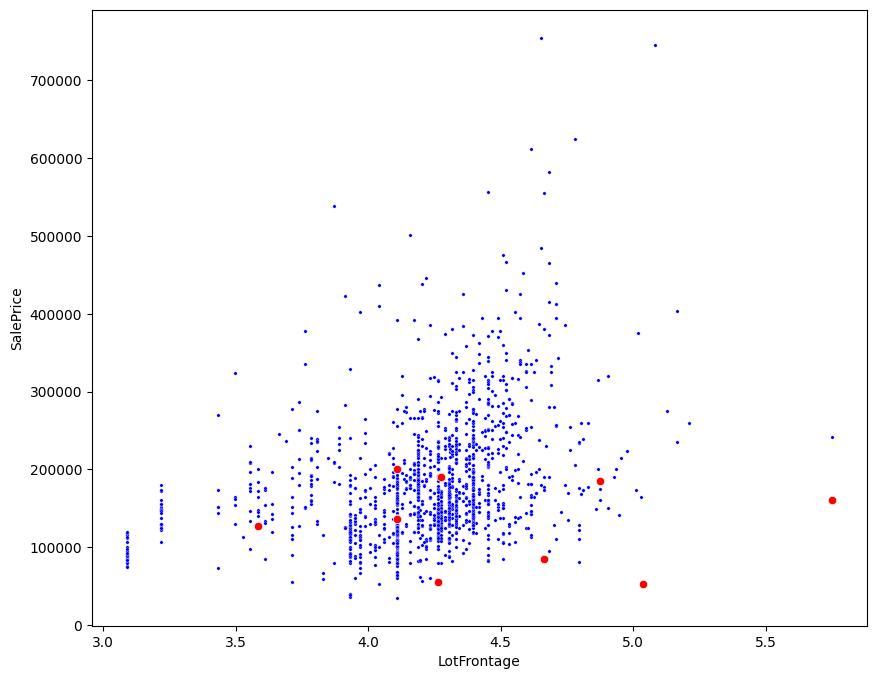

In [33]:
figure = plt.figure(figsize = (10, 8))
sns.scatterplot(x=train['LotFrontage'], y=y, color = "blue", s = 6)
# plot outlier values
sns.scatterplot(x=train.iloc[outlier_indices]['LotFrontage'], y=y[outlier_indices], color = "red")

In [34]:
outlier_values.index

Int64Index([178, 185, 440, 495, 533, 691, 769, 798, 803, 898, 916, 968, 1046,
            1169, 1182],
           dtype='int64')

<Axes: xlabel='PoolArea', ylabel='SalePrice'>

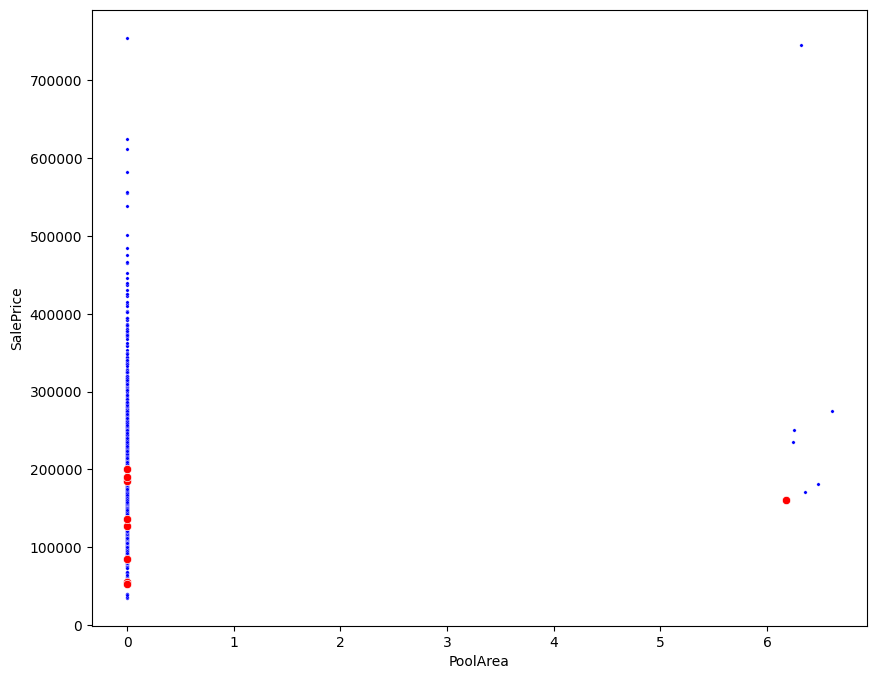

In [35]:
figure = plt.figure(figsize = (10, 8))
sns.scatterplot(x=train['PoolArea'], y=y, color = "blue", s = 6)
# plot outlier values
sns.scatterplot(x=train.iloc[outlier_indices]['PoolArea'], y=y[outlier_indices], color = "red")

# FEATURE ENGINEERING

In [36]:
X=train.drop(columns=['SalePrice'])

In [37]:
X.shape

(1460, 219)

In [38]:
X['YrBltAndRemod'] = X['YearBuilt'] + X['YearRemodAdd']
X['TotalSF'] = X['TotalBsmtSF'] + X['1stFlrSF'] + X['2ndFlrSF']

X['Total_sqr_footage'] = (X['BsmtFinSF1'] + X['BsmtFinSF2'] +
                          X['1stFlrSF'] + X['2ndFlrSF'])

X['Total_Bathrooms'] = (X['FullBath'] + (0.5 * X['HalfBath']) +
                        X['BsmtFullBath'] + (0.5 * X['BsmtHalfBath']))

X['Total_porch_sf'] = (X['OpenPorchSF'] + X['3SsnPorch'] +
                       X['EnclosedPorch'] + X['ScreenPorch'] +
                       X['WoodDeckSF'])

In [39]:
X['haspool'] = X['PoolArea'].apply(lambda x: 1 if x > 0 else 0)
X['has2ndfloor'] = X['2ndFlrSF'].apply(lambda x: 1 if x > 0 else 0)
#X['hasgarage'] = X['GarageArea'].apply(lambda x: 1 if x > 0 else 0)
X['hasbsmt'] = X['TotalBsmtSF'].apply(lambda x: 1 if x > 0 else 0)
X['hasfireplace'] = X['Fireplaces'].apply(lambda x: 1 if x > 0 else 0)

# Old houses have higher prices

<Axes: xlabel='YrSold'>

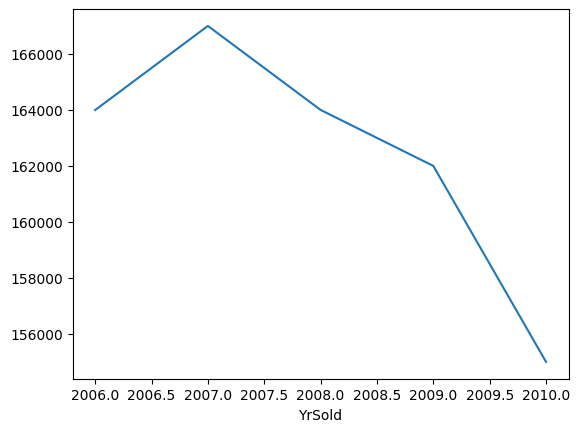

In [40]:
train.groupby('YrSold')['SalePrice'].median().plot()

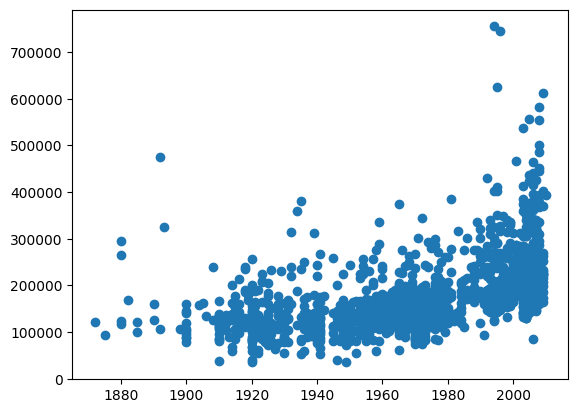

In [41]:
plt.scatter(train['YearBuilt'],train['SalePrice'])

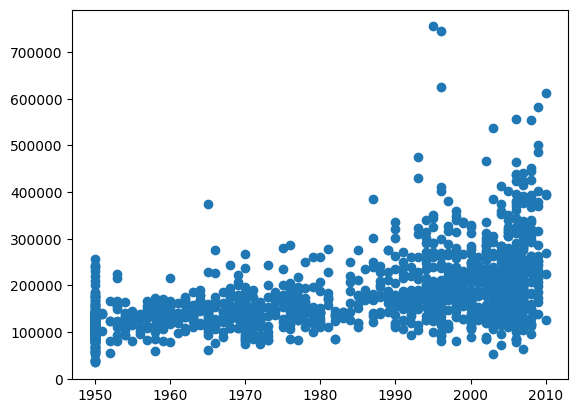

In [42]:
plt.scatter(train['YearRemodAdd'],train['SalePrice'])

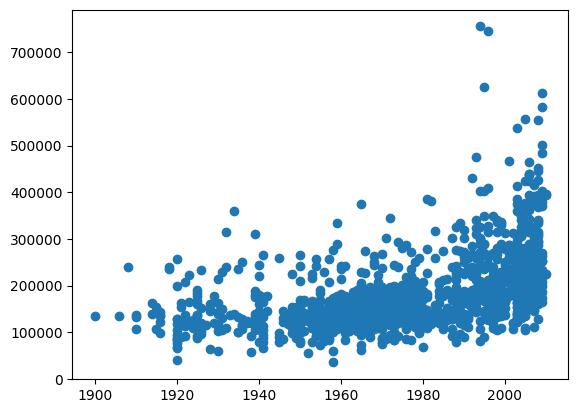

In [43]:
plt.scatter(train[train['GarageYrBlt']>0]['GarageYrBlt'],train[train['GarageYrBlt']>0]['SalePrice'])

In [44]:
for feature in ['YearBuilt','YearRemodAdd','GarageYrBlt']:
    X[feature]=X['YrSold']-X[feature]

In [45]:
#X.drop(columns='YrSold',inplace=True)

In [48]:
(pd.concat([X,pd.DataFrame(y)],axis=1).drop(index=outlier_indices)).to_csv("Final_housePricedata.csv")